In [ ]:
import glob
import os
from pathlib import Path

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
from natsort import natsorted

### HCP3D 0.7mm

In [ ]:
raw_data_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore")

In [ ]:
raw_files = os.listdir(raw_data_path)
print(len(raw_files))
data_shape = nib.load(raw_data_path / raw_files[0]).get_fdata().shape
print(data_shape)

mask_res = np.zeros(data_shape)

for i, file in enumerate(raw_files):
    tmp = nib.load(raw_data_path / raw_files[i]).get_fdata() > 0
    tmp = tmp.astype(np.int32)
    mask_res += tmp
    if i % 100 == 0:
        print(i)

1104
(260, 311, 260)
0
100
200
300
400
500
600
700
800
900
1000
1100


In [ ]:
np.save("hcp3d_total_mask_1104.npy", mask_res)

In [ ]:
mask_res = np.load("hcp3d_total_mask_1104.npy")
print(mask_res.min(), mask_res.max())

coords = np.argwhere(mask_res > 0)

print(coords.shape)
# Find the min/max bounds for x, y, z
x_min, y_min, z_min = coords[:, 0].min(), coords[:, 1].min(), coords[:, 2].min()
x_max, y_max, z_max = coords[:, 0].max(), coords[:, 1].max(), coords[:, 2].min()

print(x_min, x_max)
print(y_min, y_max)
print(z_min, z_max)

0.0 1104.0
(260, 311, 260)
(6880813, 3)
20 238
11 302
0 226


In [ ]:
x_min_lim, x_max_lim = 17, 240
y_min_lim, y_max_lim = 9, 304
z_min_lim, z_max_lim = 3, 226

print(x_max_lim - x_min_lim + 1)
print(y_max_lim - y_min_lim + 1)
print(z_max_lim - z_min_lim + 1)

224
296
224


1048.8746851806272
1930.1453857421875
1012.4516190368597
1273.0570068359375
927.8443836913866
1630.378662109375
1561.2372788938524
3093.3837890625
1112.7806543945298
2229.2177734375
987.8171259093967
2037.794921875
1077.158564624021
1591.8328857421875
987.5593365112222
1464.4378662109375
1140.7526519531166
2343.717041015625
898.583454821774
1310.115966796875


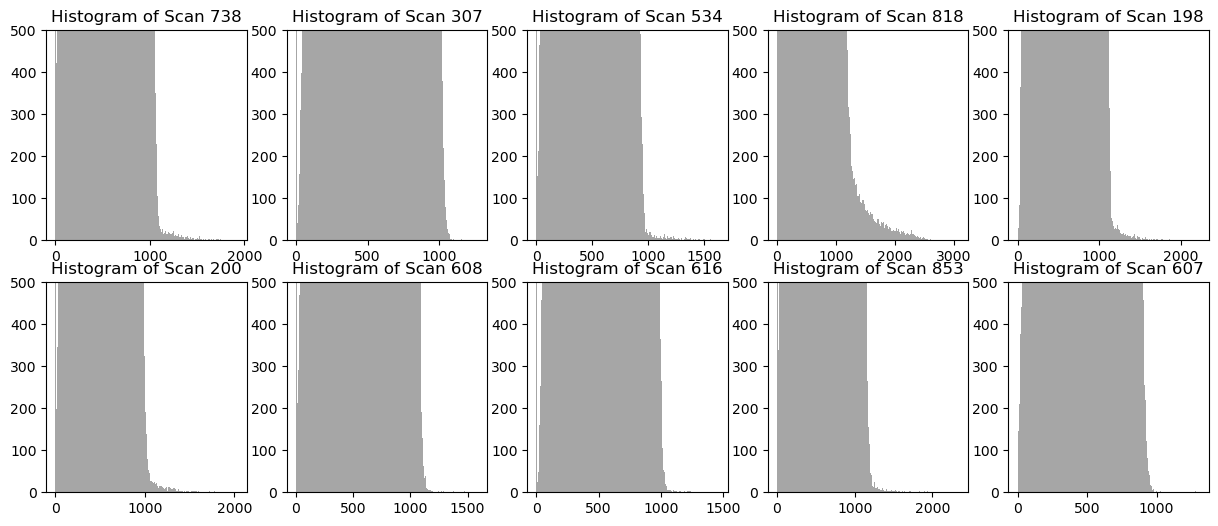

In [ ]:
raw_data_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore")
dst_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped")
scaled_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped_scaled")
raw_files = os.listdir(raw_data_path)

idx = np.random.randint(0, 1000, size=10)
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    data = nib.load(raw_data_path / raw_files[idx[i]]).get_fdata()
    ax.hist(data.ravel(), bins=256, color="gray", alpha=0.7)
    ax.set_title(f"Histogram of Scan {idx[i]}")
    ax.set_ylim(0, 500)

    print(np.percentile(data, 99.99))
    print(data.max())

    # print(len(data.ravel()) * (1-0.9999))

In [ ]:
raw_data_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore")
dst_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped")
scaled_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped_scaled")

dst_path.mkdir(exist_ok=True)
scaled_path.mkdir(exist_ok=True)

raw_files = os.listdir(raw_data_path)

x_min_lim, x_max_lim = 17, 240
y_min_lim, y_max_lim = 9, 304
z_min_lim, z_max_lim = 3, 226

for i, file in enumerate(raw_files):
    data = nib.load(raw_data_path / file)
    matrix = data.affine
    data = data.get_fdata()

    # crop
    cropped_data = data[x_min_lim : x_max_lim + 1, y_min_lim : y_max_lim + 1, z_min_lim : z_max_lim + 1]
    out_file = nib.Nifti1Image(cropped_data, matrix)
    nib.save(out_file, dst_path / file)

    # scale
    data_max = np.percentile(cropped_data, 99.99)
    data_min = cropped_data.min()

    scaled_data = (cropped_data - data_min) / (data_max - data_min)
    scaled_data = scaled_data * 2 - 1

    out_file = nib.Nifti1Image(scaled_data, matrix)
    nib.save(out_file, scaled_path / file)

    # plt.hist(scaled_data.ravel(), bins=256, color="gray", alpha=0.7)
    # plt.ylim(0, 500)
    # plt.show()

    if i % 50 == 0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050


In [ ]:
# scale the images by global value 1500

raw_data_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore")
dst_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped")
scaled_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped_scaled")
global_scaled_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped_globalscaled")

dst_path.mkdir(exist_ok=True)
scaled_path.mkdir(exist_ok=True)
global_scaled_path.mkdir(exist_ok=True)

raw_files = os.listdir(raw_data_path)

x_min_lim, x_max_lim = 17, 240
y_min_lim, y_max_lim = 9, 304
z_min_lim, z_max_lim = 3, 226

for i, file in enumerate(raw_files):
    data = nib.load(raw_data_path / file)
    matrix = data.affine
    data = data.get_fdata()

    # crop
    cropped_data = data[x_min_lim : x_max_lim + 1, y_min_lim : y_max_lim + 1, z_min_lim : z_max_lim + 1]

    # scale
    data_max = 1500
    data_min = 0

    scaled_data = (cropped_data - data_min) / (data_max - data_min)
    scaled_data = scaled_data * 2 - 1

    out_file = nib.Nifti1Image(scaled_data, matrix)
    nib.save(out_file, global_scaled_path / file)

    # plt.hist(scaled_data.ravel(), bins=256, color="gray", alpha=0.7)
    # plt.ylim(0, 500)
    # plt.show()

    if i % 50 == 0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100


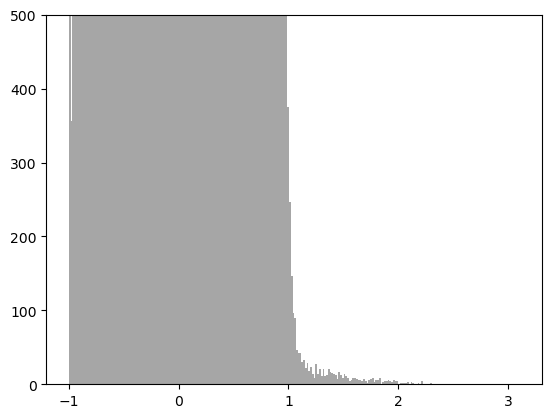

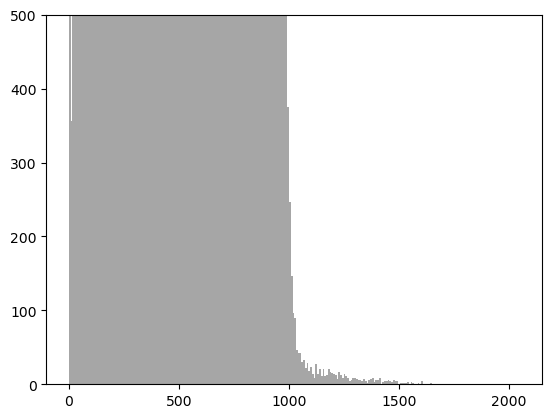

In [ ]:
raw_data_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore")
dst_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped")
scaled_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped_scaled")

raw_files = os.listdir(scaled_path)

for i, file in enumerate(raw_files):
    tmp = nib.load(scaled_path / file).get_fdata()
    plt.hist(tmp.ravel(), bins=256, color="gray", alpha=0.7)
    plt.ylim(0, 500)
    plt.show()

    tmp = nib.load(dst_path / file).get_fdata()
    plt.hist(tmp.ravel(), bins=256, color="gray", alpha=0.7)
    plt.ylim(0, 500)
    plt.show()
    break

In [ ]:
import pandas as pd

raw_data_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore")
dst_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped")
scaled_path = Path("/home/sz9jt/data/HCP3D/brain_acpc_dc_restore_cropped_scaled")

raw_files = os.listdir(scaled_path)
raw_files.sort()

len_train = int(len(raw_files) * 0.8)
len_test = len(raw_files) - len_train
print(len_train, len_test)

df = pd.DataFrame(columns=["scan", "split"])
df["scan"] = raw_files
df["split"] = ["train"] * len_train + ["test"] * len_test
df.to_csv(scaled_path / "../split.csv", index=False)

883 221


### HCP3D 1mm

In [ ]:
spilt_path = "/home/sz9jt/projects/generative_brain/src/splits/t1w_brain_2176340263_split_1.csv"
split_df = pd.read_csv(spilt_path, comment="#", index_col=None)

hcp_split_df = split_df[split_df["dataset_name"] == "hcp"]
hcp_split_df = hcp_split_df.reset_index(drop=True)
hcp_split_df["split"].value_counts()

df_len = len(hcp_split_df)
val_len = 2
train_len = int(df_len * 0.8) - val_len
test_len = df_len - train_len - val_len

hcp_split_df["split_80"] = ["train"] * train_len + ["val"] * val_len + ["test"] * test_len
hcp_split_df.to_csv("/home/sz9jt/projects/generative_brain/src/splits/hcp_3d_split.csv", index=False)

In [ ]:
import hcp_3d


def get_data_path_1mm(base_path, dataset_name, subj_id, session_id, run_id):
    # deal with empty session_id and run_id
    if session_id == "EMPTY":
        session_id = ""
    if run_id == "EMPTY":
        run_id = ""

    if dataset_name == "hcp":
        return os.path.join(
            base_path,
            dataset_name,
            "derivatives/acpc_align",
            subj_id,
            session_id,
            run_id,
            "acpc-align_1mm_interpolated/acpc_1mm_t1w_brain.nii.gz",
        )
    else:
        raise ValueError("Unknown dataset name: %s" % dataset_name)


root_dir = "/home/sz9jt/data/t1w_processed/outputs/"
hcp_split_df = pd.read_csv("/home/sz9jt/projects/generative_brain/src/splits/hcp_3d_split.csv")
hcp_split_df = hcp_split_df.astype(str)

data_paths = []
cols = ["dataset_name", "subj_id", "session_id", "run_id"]
for i in range(len(hcp_split_df)):
    path = get_data_path_1mm(root_dir, *hcp_split_df[cols].iloc[i])
    data_paths.append(path)
print(len(data_paths))

all_sizes = []
for i, path in enumerate(data_paths):
    data = nib.load(path).get_fdata()
    all_sizes.append(data.shape)
    if i % 100 == 0:
        print(i)

all_sizes = np.array(all_sizes)
print(all_sizes.shape)

hcp_split_df["dim_x"] = all_sizes[:, 0]
hcp_split_df["dim_y"] = all_sizes[:, 1]
hcp_split_df["dim_z"] = all_sizes[:, 2]
hcp_split_df.to_csv("/home/sz9jt/projects/generative_brain/src/splits/hcp_3d_split.csv", index=False)

print(all_sizes[:, 0].min(), all_sizes[:, 0].max())
print(all_sizes[:, 1].min(), all_sizes[:, 1].max())
print(all_sizes[:, 2].min(), all_sizes[:, 2].max())

1104
0
100
200
300
400
500
600
700
800
900
1000
1100


In [ ]:
hcp_split_df = pd.read_csv("/home/sz9jt/projects/generative_brain/src/splits/hcp_3d_split.csv")

print(hcp_split_df["dim_x"].min(), hcp_split_df["dim_x"].max())
print(hcp_split_df["dim_y"].min(), hcp_split_df["dim_y"].max())
print(hcp_split_df["dim_z"].min(), hcp_split_df["dim_z"].max())

123 157
157 204
123 157


(133, 174, 144)
(145, 190, 147)
(142, 190, 143)
(137, 181, 141)
(141, 161, 145)
(153, 192, 143)
(134, 180, 145)
(141, 176, 137)
(134, 172, 143)
(146, 191, 154)


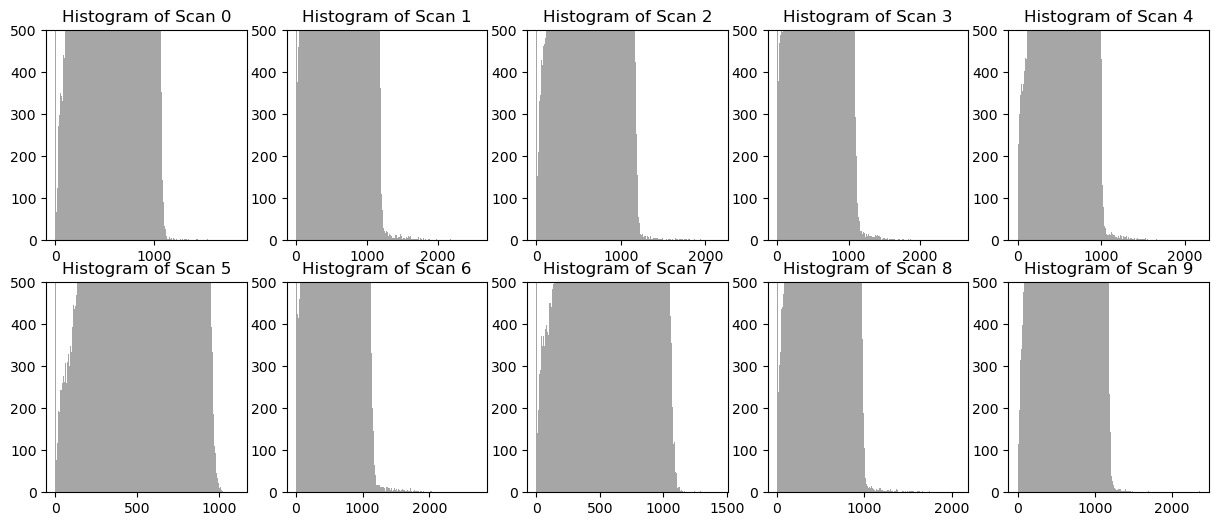

In [ ]:
rand_idx = np.random.randint(0, len(hcp_split_df), size=10)
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(rand_idx):
    data = nib.load(data_paths[idx]).get_fdata()
    print(data.shape)
    ax = axs.flat[i]
    ax.hist(data.ravel(), bins=256, color="gray", alpha=0.7)
    ax.set_title(f"Histogram of Scan {i}")
    ax.set_ylim(0, 500)
plt.show()

In [ ]:
import hcp_3d
import torch
import torch.nn.functional as F


def get_data_path_1mm(base_path, dataset_name, subj_id, session_id, run_id):
    # deal with empty session_id and run_id
    if session_id == "EMPTY":
        session_id = ""
    if run_id == "EMPTY":
        run_id = ""

    if dataset_name == "hcp":
        return os.path.join(
            base_path,
            dataset_name,
            "derivatives/acpc_align",
            subj_id,
            session_id,
            run_id,
            "acpc-align_1mm_interpolated/acpc_1mm_t1w_brain.nii.gz",
        )
    else:
        raise ValueError("Unknown dataset name: %s" % dataset_name)


root_dir = "/home/sz9jt/data/t1w_processed/outputs/"
hcp_split_df = pd.read_csv("/home/sz9jt/projects/generative_brain/src/splits/hcp_3d_split.csv")
hcp_split_df = hcp_split_df.astype(str)

data_paths = []
cols = ["dataset_name", "subj_id", "session_id", "run_id"]
for i in range(len(hcp_split_df)):
    path = get_data_path_1mm(root_dir, *hcp_split_df[cols].iloc[i])
    data_paths.append(path)
print(len(data_paths))


for i, file in enumerate(data_paths):
    output_size = (160, 208, 160)

    data = nib.load(file)
    matrix = data.affine
    data = data.get_fdata()

    pad1 = (output_size[2] - data.shape[2]) // 2
    pad2 = (output_size[2] - data.shape[2]) - pad1
    pad3 = (output_size[1] - data.shape[1]) // 2
    pad4 = (output_size[1] - data.shape[1]) - pad3
    pad5 = (output_size[0] - data.shape[0]) // 2
    pad6 = (output_size[0] - data.shape[0]) - pad5

    print(data.shape)

    assert pad1 >= 0
    assert pad2 >= 0
    assert pad3 >= 0
    assert pad4 >= 0
    assert pad5 >= 0
    assert pad6 >= 0

    imgout = torch.from_numpy(data).float()
    imgout = torch.unsqueeze(imgout, 0)
    imgout = F.pad(imgout, (pad1, pad2, pad3, pad4, pad5, pad6), mode="replicate")

    # scale with constant
    data_max = 1500
    data_min = 0

    scaled_data = (imgout - data_min) / (data_max - data_min)
    scaled_data = scaled_data * 2 - 1
    scaled_data = scaled_data.numpy().squeeze()
    print(scaled_data.shape)

    np.save(Path(file).parent / "scaled_padded_data.npy", scaled_data)

    tmp = nib.Nifti1Image(scaled_data, affine=matrix)
    nib.save(tmp, Path(file).parent / "scaled_padded_data.nii.gz")

    if i % 100 == 0:
        print(i)

In [ ]:
import hcp_3d

root_dir = "/home/sz9jt/data/t1w_processed/outputs/"
ds = hcp_3d.HCP3DDataset1mm(root_dir=root_dir, type="all")

All data: 1104
Dataset size: 1104


### Tom's HCP dataset

In [ ]:
root_dir = Path("/home/sz9jt/data/HCP_preprocess")

subjects = os.listdir(root_dir)
subjects = [x for x in subjects if os.path.isdir(root_dir / x)]
subjects = natsorted(subjects)
print(len(subjects))

train_id = np.load(root_dir / "trainIDs.npy")
print(train_id[0], len(train_id))

train_id = [x.split("/")[-3] for x in train_id]
print(train_id[:10])

# create csv file
df = pd.DataFrame(columns=["subject", "split"])
tmp_split = []
for item in subjects:
    if item in train_id:
        tmp_split.append("train")
    else:
        tmp_split.append("test")
df["subject"] = subjects
df["split"] = tmp_split

print(len(df), df["split"].value_counts())
df.to_csv(root_dir / "hcp_split.csv", index=False)

1113
/data/HCP_preprocess/432332/T1w/T1w_cropped.nii.gz 890
['432332', '361234', '622236', '380036', '192439', '128935', '156334', '962058', '172029', '601127']
1113 split
train    890
test     223
Name: count, dtype: int64


orig max 1.0
recon max 0.7947289943695068
orig max 1.0
recon max 0.6828372478485107
orig max 1.0
recon max 0.6494982242584229
orig max 0.71132861328125
recon max 0.48141634464263916
orig max 1.0
recon max 0.5615592002868652


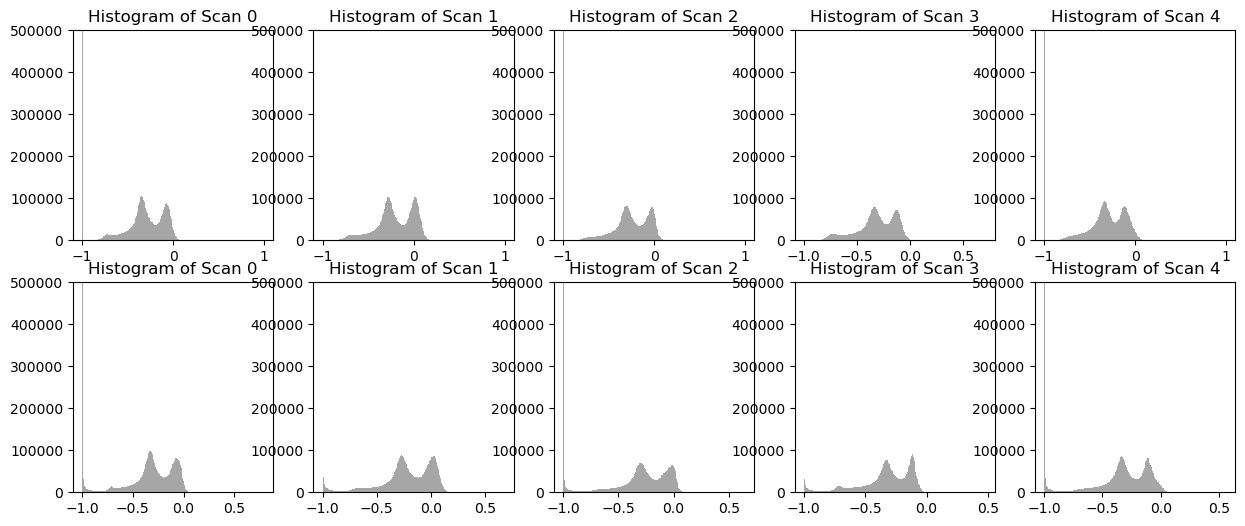

In [ ]:
# plot histograms of original data and reconstructed data
df = pd.read_csv(root_dir / "hcp_split.csv")
df = df.astype(str)

idxs = np.random.randint(0, len(df), size=5)
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(idxs):
    orig_data = nib.load(root_dir / df["subject"].iloc[idx] / "T1w/T1w_cropped.nii.gz")
    orig_data = orig_data.get_fdata()

    ax = axs[:, i][0]
    ax.hist(orig_data.ravel(), bins=256, color="gray", alpha=0.7)
    ax.set_title(f"Histogram of Scan {i}")
    print(f"orig max {orig_data.max()}")
    ax.set_ylim(0, 500000)

    recon_data = nib.load(root_dir / df["subject"].iloc[idx] / "T1w/T1w_reconstructed.nii.gz")
    recon_data = recon_data.get_fdata()
    ax = axs[:, i][1]
    ax.hist(recon_data.ravel(), bins=256, color="gray", alpha=0.7)
    ax.set_title(f"Histogram of Scan {i}")
    print(f"recon max {recon_data.max()}")
    ax.set_ylim(0, 500000)
plt.show()

(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)


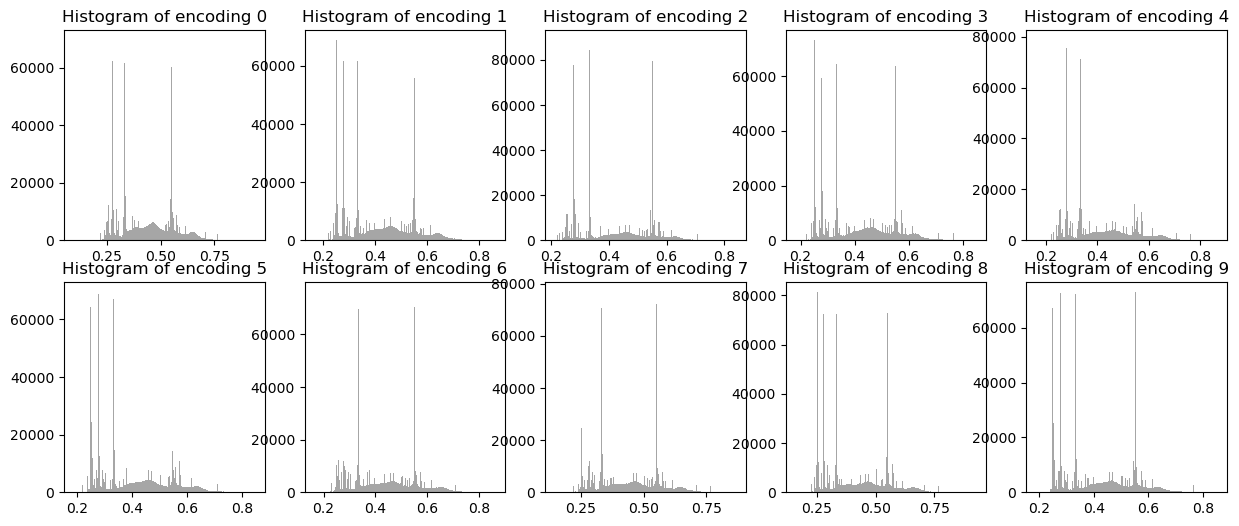

In [ ]:
df = pd.read_csv(root_dir / "hcp_split.csv")
df = df.astype(str)

idxs = np.random.randint(0, len(df), size=10)
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(idxs):
    data = np.load(root_dir / df["subject"].iloc[idx] / "T1w/T1w_encoded.npy")
    print(data.shape)
    ax = axs.flat[i]
    ax.hist(data.ravel(), bins=256, color="gray", alpha=0.7)
    ax.set_title(f"Histogram of encoding {i}")

In [ ]:
# perform channelwise normalization
def get_range_per_channel_numpy(root_dir):
    root_dir = Path(root_dir)

    df = pd.read_csv(root_dir / "hcp_split.csv")
    df = df.astype(str)

    print(f"Number of encodings: {len(df)}")
    encodings = df["subject"].values

    min_values = []
    max_values = []

    # Load a sample file to determine the number of channels
    tmp = np.load(root_dir / encodings[0] / "T1w/T1w_encoded.npy")
    print(f"Encoding shape: {tmp.shape}")
    num_ch = tmp.shape[1]
    print(f"Encoding number of channels: {num_ch}")

    # Initialize lists to store min and max values for each channel
    chwise_min_values = [[] for _ in range(num_ch)]
    chwise_max_values = [[] for _ in range(num_ch)]

    for i, sub in enumerate(encodings):
        data = np.load(root_dir / sub / "T1w/T1w_encoded.npy")
        min_values.append(data.min())
        max_values.append(data.max())

        # how to handle uncertain multiple channels here
        for ch in range(num_ch):
            chwise_min_values[ch].append(data[:, ch, :, :, :].min())
            chwise_max_values[ch].append(data[:, ch, :, :, :].max())

        if i % 100 == 0:
            print(i)

    tmp = np.array(chwise_min_values)
    print(tmp.shape)
    tmp = np.array(chwise_max_values)
    print(tmp.shape)
    tmp = np.array(min_values)
    print(tmp.shape)

    plt.hist(min_values, bins=100)
    plt.hist(max_values, bins=100)
    plt.savefig(os.path.join(root_dir, "encoding_range.png"))
    plt.close()

    for i in range(num_ch):
        plt.hist(chwise_min_values[i], bins=100)
        plt.hist(chwise_max_values[i], bins=100)
        plt.savefig(os.path.join(root_dir, f"c{i+1}_encoding_range.png"))
        plt.close()

    return min_values, max_values, chwise_min_values, chwise_max_values


root_dir = Path("/home/sz9jt/data/HCP_preprocess")
min_values, max_values, chwise_min_values, chwise_max_values = get_range_per_channel_numpy(root_dir)

Number of encodings: 1113
Encoding shape: (1, 4, 56, 72, 56)
Encoding number of channels: 4
0
100
200
300
400
500
600
700
800
900
1000
1100
(4, 1113)
(4, 1113)
(1113,)


In [ ]:
cutoff_vals = [[0.2, 0.9], [0.1, 0.65], [0.1, 0.85], [0.2, 1.0]]

for i in range(4):
    leftval = cutoff_vals[i][0]
    rightval = cutoff_vals[i][1]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].hist(chwise_min_values[i], bins=100)
    axs[0].hist(chwise_max_values[i], bins=100)
    axs[0].set_ylim(0, 10)
    axs[0].set_title(f"ch{i + 1} {leftval} {rightval}")
    axs[0].axvline(x=leftval, color="r", linestyle="--")
    axs[0].axvline(x=rightval, color="r", linestyle="--")

    axs[1].hist(chwise_min_values[i], bins=100)
    axs[1].hist(chwise_max_values[i], bins=100)
    axs[1].set_title(f"ch{i + 1}")
    axs[1].axvline(x=leftval, color="r", linestyle="--")
    axs[1].axvline(x=rightval, color="r", linestyle="--")

    # plt.show()
    plt.savefig(root_dir / f"c{i+1}_encoding_range.png")
    plt.close()

In [ ]:
tmp = np.array(chwise_min_values[-1])
print(tmp.min(), tmp.max())

tmp = np.array(chwise_max_values[-1])
print(tmp.min(), tmp.max())

0.20228058 0.21088536
0.62274045 0.97861975


In [ ]:
# rescale all encodings
df = pd.read_csv(root_dir / "hcp_split.csv")
df = df.astype(str)


def scale_to_range(data, leftval, rightval):
    data = (data - leftval) / (rightval - leftval)
    data = data * 2 - 1
    return data


cutoff_vals = [[0.2, 0.9], [0.1, 0.65], [0.1, 0.85], [0.2, 1.0]]

for i, sub in enumerate(df["subject"]):
    data = np.load(root_dir / sub / "T1w/T1w_encoded.npy")
    for ch in range(data.shape[1]):
        data[:, ch, :, :, :] = scale_to_range(data[:, ch, :, :, :], cutoff_vals[ch][0], cutoff_vals[ch][1])
    # for i in range(data.shape[1]):
    #     print(data[:, i, :, :, :].min(), data[:, i, :, :, :].max())
    np.save(root_dir / sub / "T1w/T1w_encoded_rescaled.npy", data)
    if i % 100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100


(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)
(1, 4, 56, 72, 56)


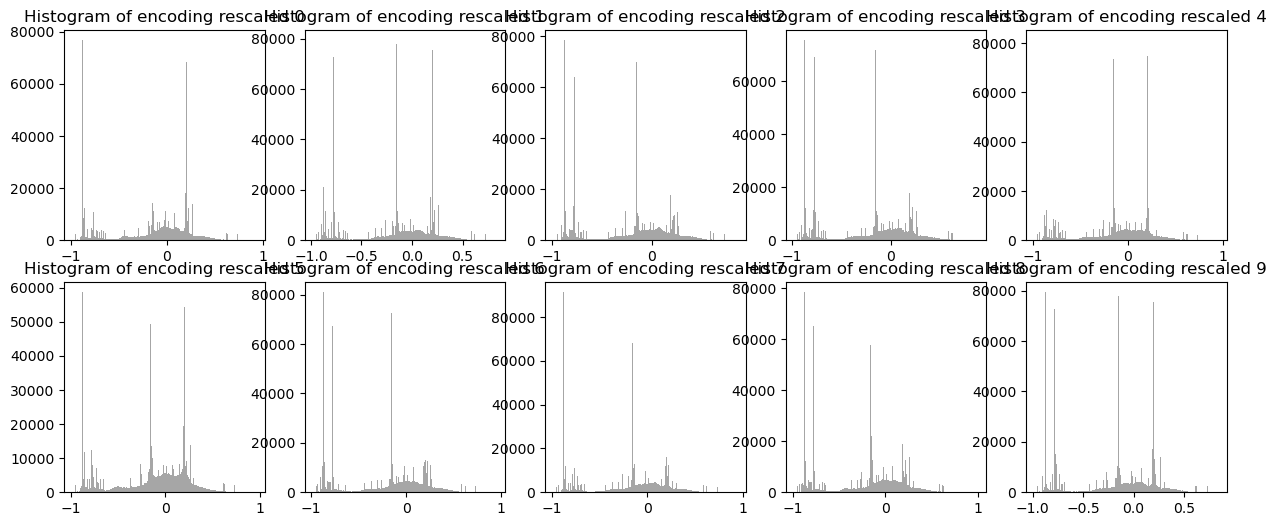

In [ ]:
idxs = np.random.randint(0, len(df), size=10)
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(idxs):
    data = np.load(root_dir / df["subject"].iloc[idx] / "T1w/T1w_encoded_rescaled.npy")
    print(data.shape)
    ax = axs.flat[i]
    ax.hist(data.ravel(), bins=256, color="gray", alpha=0.7)
    ax.set_title(f"Histogram of encoding rescaled {i}")

In [ ]:
# perform channelwise normalization
def get_range_per_channel_numpy(root_dir):
    root_dir = Path(root_dir)

    df = pd.read_csv(root_dir / "hcp_split.csv")
    df = df.astype(str)

    print(f"Number of encodings: {len(df)}")
    encodings = df["subject"].values

    min_values = []
    max_values = []

    # Load a sample file to determine the number of channels
    tmp = np.load(root_dir / encodings[0] / "T1w/T1w_encoded_rescaled.npy")
    print(f"Encoding shape: {tmp.shape}")
    num_ch = tmp.shape[1]
    print(f"Encoding number of channels: {num_ch}")

    # Initialize lists to store min and max values for each channel
    chwise_min_values = [[] for _ in range(num_ch)]
    chwise_max_values = [[] for _ in range(num_ch)]

    for i, sub in enumerate(encodings):
        data = np.load(root_dir / sub / "T1w/T1w_encoded_rescaled.npy")
        min_values.append(data.min())
        max_values.append(data.max())

        # how to handle uncertain multiple channels here
        for ch in range(num_ch):
            chwise_min_values[ch].append(data[:, ch, :, :, :].min())
            chwise_max_values[ch].append(data[:, ch, :, :, :].max())

        if i % 100 == 0:
            print(i)

    tmp = np.array(chwise_min_values)
    print(tmp.shape)
    tmp = np.array(chwise_max_values)
    print(tmp.shape)
    tmp = np.array(min_values)
    print(tmp.shape)

    plt.hist(min_values, bins=100)
    plt.hist(max_values, bins=100)
    plt.savefig(os.path.join(root_dir, "encoding_range_rescaled.png"))
    plt.close()

    return min_values, max_values, chwise_min_values, chwise_max_values


root_dir = Path("/home/sz9jt/data/HCP_preprocess")
min_values, max_values, chwise_min_values, chwise_max_values = get_range_per_channel_numpy(root_dir)

for i in range(4):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].hist(chwise_min_values[i], bins=100)
    axs[0].hist(chwise_max_values[i], bins=100)
    axs[0].set_ylim(0, 10)
    axs[0].set_title(f"ch{i + 1}")

    axs[1].hist(chwise_min_values[i], bins=100)
    axs[1].hist(chwise_max_values[i], bins=100)
    axs[1].set_title(f"ch{i + 1}")

    # plt.show()
    plt.savefig(root_dir / f"c{i+1}_encoding_range_rescaled.png")
    plt.close()

Number of encodings: 1113
Encoding shape: (1, 4, 56, 72, 56)
Encoding number of channels: 4
0
100
200
300
400
500
600
700
800
900
1000
1100
(4, 1113)
(4, 1113)
(1113,)


In [ ]:
from pathlib import Path

import hcp_3d

root_dir = Path("/home/sz9jt/data/HCP_preprocess")
ds = hcp_3d.TomsHCP3DEncodingsDataset(root_dir=root_dir, type="all")

for i in range(10):
    data = ds[i]
    print(data["data"].shape)

All data: 1113
Dataset size: 1113
torch.Size([1, 4, 56, 72, 56]) tensor(-0.9728) tensor(0.8972)
tensor(-0.8436) tensor(0.8972)
tensor(-0.3776) tensor(0.8486)
tensor(-0.8692) tensor(0.6294)
tensor(-0.9728) tensor(0.5701)
torch.Size([1, 4, 56, 72, 56])
torch.Size([1, 4, 56, 72, 56]) tensor(-0.9762) tensor(0.9498)
tensor(-0.8436) tensor(0.9067)
tensor(-0.8378) tensor(0.8437)
tensor(-0.8333) tensor(0.9498)
tensor(-0.9762) tensor(0.7995)
torch.Size([1, 4, 56, 72, 56])
torch.Size([1, 4, 56, 72, 56]) tensor(-0.9728) tensor(0.8787)
tensor(-0.8436) tensor(0.8787)
tensor(-0.4268) tensor(0.8281)
tensor(-0.7752) tensor(0.6282)
tensor(-0.9728) tensor(0.6477)
torch.Size([1, 4, 56, 72, 56])
torch.Size([1, 4, 56, 72, 56]) tensor(-0.9881) tensor(0.9187)
tensor(-0.8436) tensor(0.9038)
tensor(-0.8926) tensor(0.8988)
tensor(-0.9881) tensor(0.9187)
tensor(-0.9728) tensor(0.7158)
torch.Size([1, 4, 56, 72, 56])
torch.Size([1, 4, 56, 72, 56]) tensor(-0.9728) tensor(0.8370)
tensor(-0.8436) tensor(0.8370)
tenso

#### process patch-based dataset

In [ ]:
# generate mask
root_dir = Path("/home/sz9jt/data/HCP_preprocess")

subjects = os.listdir(root_dir)
subjects = [x for x in subjects if os.path.isdir(root_dir / x)]
subjects = natsorted(subjects)
print(len(subjects))

data_shape = nib.load(root_dir / subjects[0] / "T1w/T1w_cropped.nii.gz").get_fdata().shape
all_masks = np.zeros(data_shape)

for i, sub in enumerate(subjects):
    if not os.path.exists(root_dir / sub / "T1w/T1w_cropped.nii.gz"):
        print(sub)
    if not os.path.exists(root_dir / sub / "T1w/T1w_reconstructed.nii.gz"):
        print(sub)

    data = nib.load(root_dir / sub / "T1w/T1w_cropped.nii.gz").get_fdata()
    mask = (data > -1).astype(np.int32)
    assert data.min() == -1, print(sub)
    all_masks += mask
    np.save(root_dir / sub / "T1w/T1w_cropped_mask.npy", mask)
    if i % 100 == 0:
        print(i)

np.save(root_dir / "hcp3d_total_mask.npy", all_masks)
tmp = nib.Nifti1Image(all_masks, affine=np.eye(4))
nib.save(tmp, root_dir / "hcp3d_total_mask.nii.gz")

1113
0
100
200
300
400
500
600
700
800
900
1000
1100


In [ ]:
# get mask
import torch

root_dir = Path("/home/sz9jt/data/HCP_preprocess")
mask = np.load(root_dir / "hcp3d_total_mask.npy")
binary_mask = (mask > 0).astype(np.int32)
binary_mask = torch.tensor(binary_mask)

# precompute all patches
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fractions = torch.zeros(mask.shape).to(device)
binary_mask.to(device)

patch_size = (64, 64, 64)
num_patches = 0
for x in range(0, mask.shape[0] - patch_size[0] + 1):
    for y in range(0, mask.shape[1] - patch_size[1] + 1):
        for z in range(0, mask.shape[2] - patch_size[2] + 1):
            patch_mask = binary_mask[x : x + patch_size[0], y : y + patch_size[1], z : z + patch_size[2]]
            num_patches += 1
            if num_patches % 10000 == 0:
                print(num_patches)
            brain_fraction = torch.sum(patch_mask > 0) / patch_mask.numel()
            fractions[x, y, z] = brain_fraction

tmp = fractions.cpu().numpy()
np.save(root_dir / "fractions.npy", tmp)

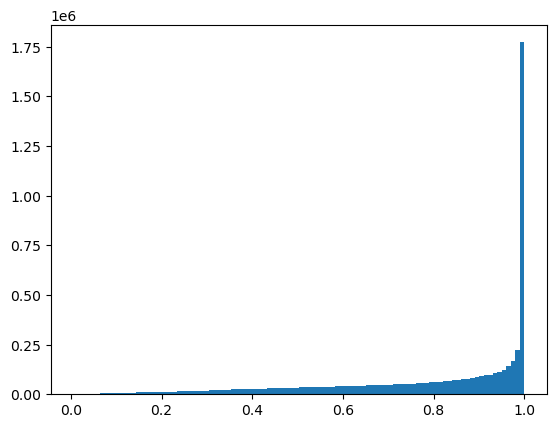

0.004924774 1.0 (161, 225, 161)
0.005276545400769004
0.9789413131352099


In [ ]:
root_dir = Path("/home/sz9jt/data/HCP_preprocess")
fractions = np.load(root_dir / "fractions.npy")
orig_shape = fractions.shape
patch_size = (64, 64, 64)
fractions = fractions[
    0 : orig_shape[0] - patch_size[0] + 1, 0 : orig_shape[1] - patch_size[1] + 1, 0 : orig_shape[2] - patch_size[2] + 1
]
plt.hist(fractions.ravel(), bins=100)
# plt.ylim(0, 900000)
plt.show()

print(fractions.min(), fractions.max(), fractions.shape)

# statistics
tmp = np.sum(fractions < 0.1) / fractions.size
print(tmp)
tmp = np.sum(fractions >= 0.2) / fractions.size
print(tmp)

5709406
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)


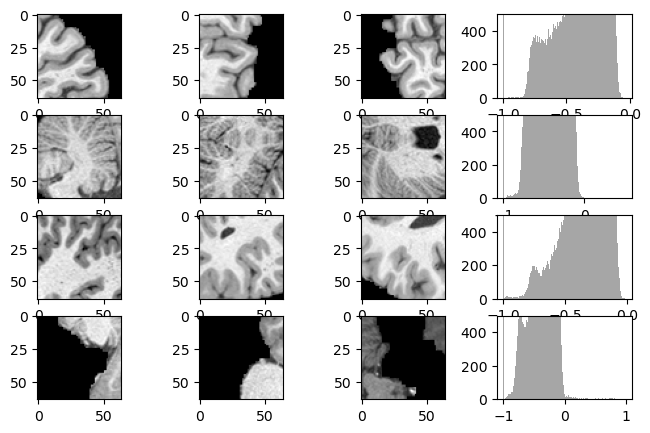

In [ ]:
sample_data = nib.load(root_dir / "996782/T1w/T1w_cropped.nii.gz")

coords = np.argwhere(fractions >= 0.2)
print(len(coords))

rand_idx = np.random.randint(0, len(coords), size=4)
fig, axs = plt.subplots(4, 4, figsize=(8, 5))
for i, idx in enumerate(rand_idx):
    x, y, z = coords[idx]
    data = sample_data.get_fdata()[x : x + 64, y : y + 64, z : z + 64]
    print(data.shape)
    ax = axs[i]
    ax[0].imshow(data[32, :, :], cmap="gray")
    ax[1].imshow(data[:, 32, :], cmap="gray")
    ax[2].imshow(data[:, :, 32], cmap="gray")
    ax[3].hist(data.ravel(), bins=256, color="gray", alpha=0.7)
    ax[3].set_ylim(0, 500)

Number of patches: 5709406 / 5832225
Threshold: 0.2
Percentage of patches >= threshold: 97.89%
(1, 64, 64, 64)
(1, 64, 64, 64)
(1, 64, 64, 64)
(1, 64, 64, 64)
(1, 64, 64, 64)
(1, 64, 64, 64)
(1, 64, 64, 64)
(1, 64, 64, 64)


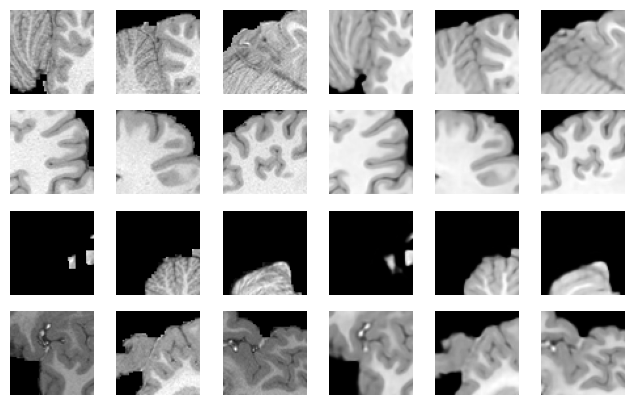

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from hcp_3d import TomsHCP3DCondPatchDataset

root_dir = Path("/home/sz9jt/data/HCP_preprocess")
ds = TomsHCP3DCondPatchDataset(root_dir=root_dir, type="all")

rand_idx = np.random.randint(0, len(ds), size=4)
fig, axs = plt.subplots(4, 6, figsize=(8, 5))
# turn off axis
for ax in axs.flat:
    ax.axis("off")

for i, idx in enumerate(rand_idx):
    data = ds[idx]
    print(data["gt_image"].shape)
    print(data["cond_image"].shape)

    gt_image = data["gt_image"].squeeze()
    cond_image = data["cond_image"].squeeze()

    ax = axs[i]
    ax[0].imshow(gt_image[32, :, :], cmap="gray")
    ax[1].imshow(gt_image[:, 32, :], cmap="gray")
    ax[2].imshow(gt_image[:, :, 32], cmap="gray")

    ax[3].imshow(cond_image[32, :, :], cmap="gray")
    ax[4].imshow(cond_image[:, 32, :], cmap="gray")
    ax[5].imshow(cond_image[:, :, 32], cmap="gray")
plt.show()

(224, 288, 224)


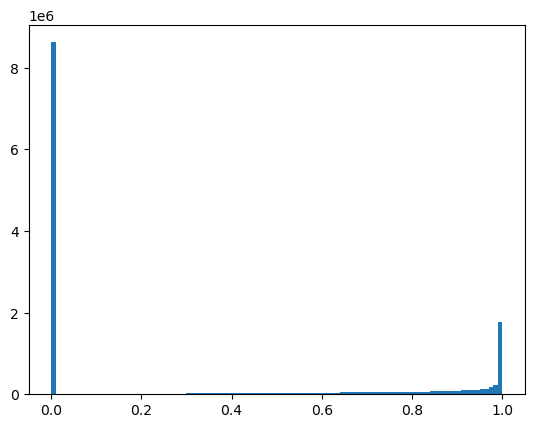

(161, 225, 161)


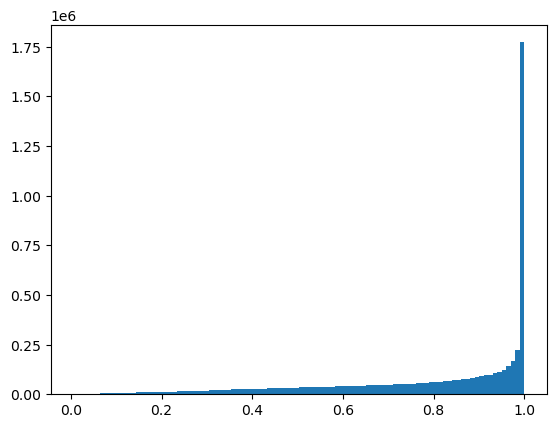

0.8012174598888074
0.004924774 1.0
(224, 288, 224)


In [ ]:
import numpy as np

data = np.load("/home/sz9jt/manifold/sz9jt/HCP_preprocess/fractions_64.npy")
print(data.shape)

import matplotlib.pyplot as plt

plt.hist(data.ravel(), bins=100)
plt.show()

tmp = data[0 : 224 - 64 + 1, 0 : 288 - 64 + 1, 0 : 224 - 64 + 1]
print(tmp.shape)

plt.hist(tmp.ravel(), bins=100)
plt.show()

print(tmp.sum() / tmp.size)
print(tmp.min(), tmp.max())

(224, 288, 224)


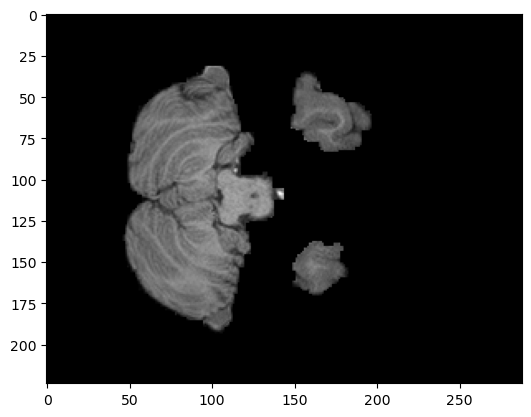

In [ ]:
import nibabel as nib

data = nib.load("/home/sz9jt/manifold/sz9jt/HCP_preprocess/996782/T1w/T1w_cropped.nii.gz").get_fdata()
print(data.shape)

# x 0 left x right
# y 0 posterior y anterior
# z 0 inferior z superior
plt.imshow(data[:, :, 40], cmap="gray")
# set x y axis label
plt.show()

In [ ]:
import importlib

import hcp3d_uncropping_ds

importlib.reload(hcp3d_uncropping_ds)

ds = hcp3d_uncropping_ds.TomsHCP3DTrainPatchUncroppingDataset(root_dir="/home/sz9jt/manifold/sz9jt/HCP_preprocess")

Using root dir /home/sz9jt/manifold/sz9jt/HCP_preprocess
All data: 1113
Dataset size: 890
Sample noisy image data range: -1.0 1.0
Sample smooth image data range: -1.0 0.7244770526885986
Number of patches: 5832225 / 5832225
Percentage of patches >= threshold: 100.00%


In [ ]:
tmp = ds[0]

Using random direction left


dict_keys(['gt_image', 'cond_image', 'mask', 'path'])
(1, 64, 64, 64)
(2, 64, 64, 64)
(1, 64, 64, 64)


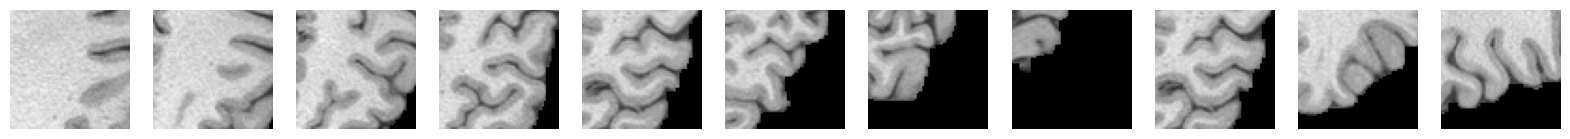

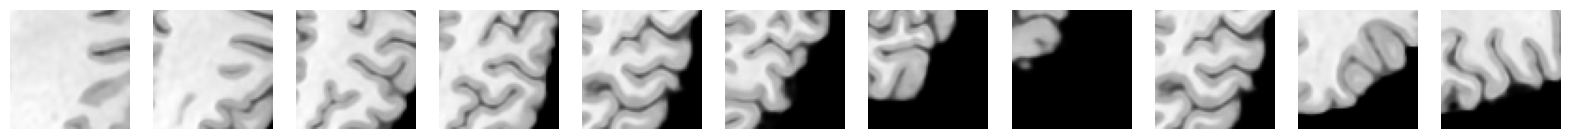

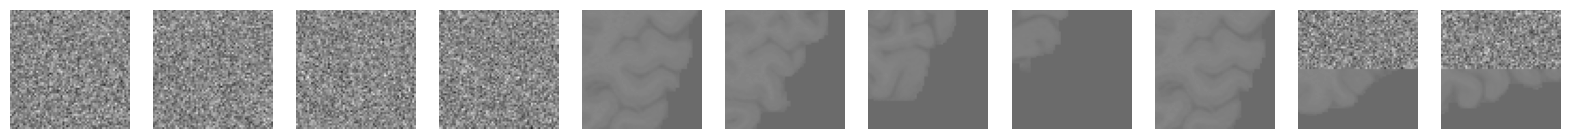

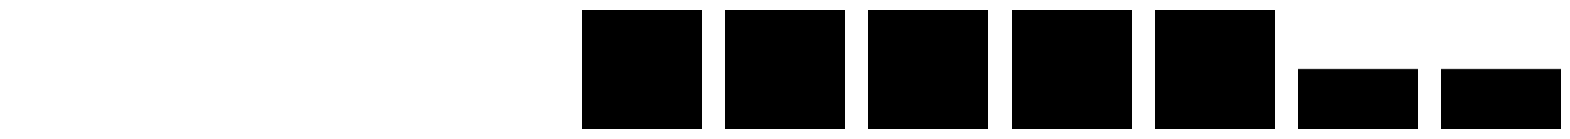

In [46]:
import matplotlib.pyplot as plt

print(tmp.keys())

print(tmp["gt_image"].shape)
print(tmp["cond_image"].shape)
print(tmp["mask"].shape)


def plot_vol(vol, clim=None):
    if clim is None:
        clim = [vol.min(), vol.max()]
    fig, axs = plt.subplots(1, 11, figsize=(20, 5))
    for i in range(8):
        axs[i].imshow(vol[i * 8, :, :], cmap="gray", clim=clim)
        axs[i].axis("off")
    axs[8].imshow(vol[32, :, :], cmap="gray", clim=clim)
    axs[8].axis("off")
    axs[9].imshow(vol[:, 32, :], cmap="gray", clim=clim)
    axs[9].axis("off")
    axs[10].imshow(vol[:, :, 32], cmap="gray", clim=clim)
    axs[10].axis("off")
    plt.show()
    plt.close()


# x     0 left      x right
# y     0 posterior y anterior
# z     0 inferior  z superior
plot_vol(tmp["gt_image"].squeeze())
plot_vol(tmp["cond_image"][0])
plot_vol(tmp["cond_image"][1])
plot_vol(tmp["mask"].squeeze())